## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.2558 - accuracy: 0.1622 - val_loss: 2.2105 - val_accuracy: 0.1908
Epoch 2/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.1752 - accuracy: 0.2138 - val_loss: 2.1461 - val_accuracy: 0.2331
Epoch 3/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.1166 - accuracy: 0.2480 - val_loss: 2.0945 - val_accuracy: 0.2609
Epoch 4/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.0706 - accuracy: 0.2716 - val_loss: 2.0542 - val_accuracy: 0.2831
Epoch 5/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.0338 - accuracy: 0.2899 - val_loss: 2.0210 - val_accuracy: 0.2976
Epoch 6/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.0032 - accuracy: 0.3019 - val_loss: 1.9930 - val_accuracy: 0.3058
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 131us/step - loss: 1.6569 - accuracy: 0.4201 - val_loss: 1.6670 - val_accuracy: 0.4168
Epoch 56/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6538 - accuracy: 0.4219 - val_loss: 1.6645 - val_accuracy: 0.4188
Epoch 57/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6509 - accuracy: 0.4220 - val_loss: 1.6630 - val_accuracy: 0.4169
Epoch 58/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6478 - accuracy: 0.4243 - val_loss: 1.6603 - val_accuracy: 0.4216
Epoch 59/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.6445 - accuracy: 0.4253 - val_loss: 1.6559 - val_accuracy: 0.4226
Epoch 60/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6415 - accuracy: 0.4266 - val_loss: 1.6540 - val_accuracy: 0.4249
Epoch 61/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.6384 - accuracy: 0.4282 - val

50000/50000 [==============================] - 7s 132us/step - loss: 1.5248 - accuracy: 0.4688 - val_loss: 1.5545 - val_accuracy: 0.4582
Epoch 110/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5225 - accuracy: 0.4702 - val_loss: 1.5490 - val_accuracy: 0.4601
Epoch 111/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5208 - accuracy: 0.4691 - val_loss: 1.5499 - val_accuracy: 0.4581
Epoch 112/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5188 - accuracy: 0.4700 - val_loss: 1.5456 - val_accuracy: 0.4617
Epoch 113/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5168 - accuracy: 0.4715 - val_loss: 1.5444 - val_accuracy: 0.4613
Epoch 114/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.5148 - accuracy: 0.4703 - val_loss: 1.5429 - val_accuracy: 0.4595
Epoch 115/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.5129 - accuracy: 0.4722

50000/50000 [==============================] - 7s 130us/step - loss: 1.4333 - accuracy: 0.5004 - val_loss: 1.4821 - val_accuracy: 0.4785
Epoch 164/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4315 - accuracy: 0.5011 - val_loss: 1.4815 - val_accuracy: 0.4758
Epoch 165/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.4297 - accuracy: 0.5020 - val_loss: 1.4857 - val_accuracy: 0.4728
Epoch 166/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4283 - accuracy: 0.5019 - val_loss: 1.4829 - val_accuracy: 0.4769
Epoch 167/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4269 - accuracy: 0.5027 - val_loss: 1.4767 - val_accuracy: 0.4791
Epoch 168/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.4253 - accuracy: 0.5031 - val_loss: 1.4791 - val_accuracy: 0.4768
Epoch 169/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.4238 - accuracy: 0.5038

50000/50000 [==============================] - 7s 130us/step - loss: 1.3564 - accuracy: 0.5262 - val_loss: 1.4352 - val_accuracy: 0.4894
Epoch 218/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.3554 - accuracy: 0.5259 - val_loss: 1.4320 - val_accuracy: 0.4934
Epoch 219/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.3541 - accuracy: 0.5259 - val_loss: 1.4399 - val_accuracy: 0.4910
Epoch 220/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.3525 - accuracy: 0.5271 - val_loss: 1.4336 - val_accuracy: 0.4908
Epoch 221/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3509 - accuracy: 0.5290 - val_loss: 1.4268 - val_accuracy: 0.4956
Epoch 222/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.3496 - accuracy: 0.5290 - val_loss: 1.4311 - val_accuracy: 0.4922
Epoch 223/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3482 - accuracy: 0.5292

50000/50000 [==============================] - 7s 132us/step - loss: 1.2890 - accuracy: 0.5511 - val_loss: 1.3997 - val_accuracy: 0.5059
Epoch 272/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2871 - accuracy: 0.5504 - val_loss: 1.3994 - val_accuracy: 0.5034- accu
Epoch 273/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2862 - accuracy: 0.5518 - val_loss: 1.3941 - val_accuracy: 0.5077
Epoch 274/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.2854 - accuracy: 0.5524 - val_loss: 1.3923 - val_accuracy: 0.5013
Epoch 275/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2846 - accuracy: 0.5522 - val_loss: 1.3950 - val_accuracy: 0.5037
Epoch 276/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2832 - accuracy: 0.5519 - val_loss: 1.4054 - val_accuracy: 0.4993
Epoch 277/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.2827 - accuracy: 

50000/50000 [==============================] - 7s 130us/step - loss: 1.2290 - accuracy: 0.5698 - val_loss: 1.3861 - val_accuracy: 0.5127
Epoch 326/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.2277 - accuracy: 0.5728 - val_loss: 1.3692 - val_accuracy: 0.5157
Epoch 327/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.2264 - accuracy: 0.5713 - val_loss: 1.3956 - val_accuracy: 0.5067
Epoch 328/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.2248 - accuracy: 0.5721 - val_loss: 1.3662 - val_accuracy: 0.5140
Epoch 329/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.2244 - accuracy: 0.5733 - val_loss: 1.3688 - val_accuracy: 0.5104
Epoch 330/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2231 - accuracy: 0.5722 - val_loss: 1.3673 - val_accuracy: 0.5125
Epoch 331/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2220 - accuracy: 0.5743

50000/50000 [==============================] - 7s 130us/step - loss: 1.1707 - accuracy: 0.5917 - val_loss: 1.3608 - val_accuracy: 0.5208
Epoch 380/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1703 - accuracy: 0.5934 - val_loss: 1.3621 - val_accuracy: 0.5157
Epoch 381/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1689 - accuracy: 0.5932 - val_loss: 1.3668 - val_accuracy: 0.5098
Epoch 382/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1676 - accuracy: 0.5926 - val_loss: 1.3654 - val_accuracy: 0.5174
Epoch 383/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1672 - accuracy: 0.5930 - val_loss: 1.3674 - val_accuracy: 0.5184
Epoch 384/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1657 - accuracy: 0.5935 - val_loss: 1.3659 - val_accuracy: 0.5108
Epoch 385/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1653 - accuracy: 0.5933

50000/50000 [==============================] - 7s 130us/step - loss: 1.1161 - accuracy: 0.6105 - val_loss: 1.3402 - val_accuracy: 0.5241
Epoch 434/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1131 - accuracy: 0.6124 - val_loss: 1.3684 - val_accuracy: 0.5243
Epoch 435/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1142 - accuracy: 0.6112 - val_loss: 1.3546 - val_accuracy: 0.5177
Epoch 436/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1122 - accuracy: 0.6122 - val_loss: 1.3641 - val_accuracy: 0.5146
Epoch 437/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1109 - accuracy: 0.6121 - val_loss: 1.3427 - val_accuracy: 0.5233
Epoch 438/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1101 - accuracy: 0.6122 - val_loss: 1.3800 - val_accuracy: 0.5081
Epoch 439/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1095 - accuracy: 0.6124

50000/50000 [==============================] - 7s 130us/step - loss: 1.0629 - accuracy: 0.6286 - val_loss: 1.3498 - val_accuracy: 0.5277
Epoch 488/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0609 - accuracy: 0.6313 - val_loss: 1.3583 - val_accuracy: 0.5246
Epoch 489/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0592 - accuracy: 0.6323 - val_loss: 1.3708 - val_accuracy: 0.5246
Epoch 490/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0589 - accuracy: 0.6313 - val_loss: 1.3697 - val_accuracy: 0.5202
Epoch 491/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0538 - accuracy: 0.6328 - val_loss: 1.3338 - val_accuracy: 0.5280
Epoch 492/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0555 - accuracy: 0.6339 - val_loss: 1.3857 - val_accuracy: 0.5178
Epoch 493/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.0555 - accuracy: 0.6328

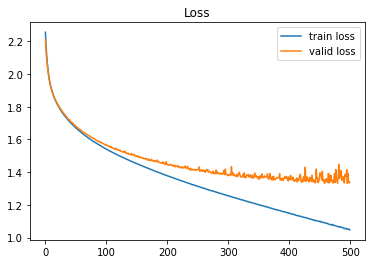

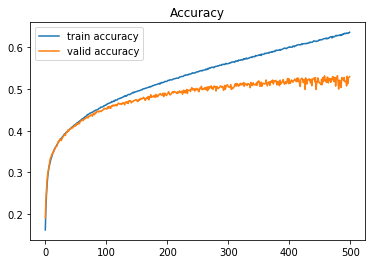

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()